In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


#change1___added libraries
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [3]:
#load train and test
train=pd.read_csv('./CS6301-S19-MidTermProject/bb_2000s_train.csv',delimiter=',',header=0)
test=pd.read_csv('./CS6301-S19-MidTermProject/bb_2000s_test.csv',delimiter=',',header=0)

In [4]:
train_y=train.iloc[:,-1]
train_x=train.iloc[:,3:-1]

#change2____added below line
train_norm_x = preprocessing.normalize(train_x, axis =0)

In [5]:
#train, test and validation partition
tst_frac=0.2
val_frac=0.2


#change3_____train_x changed to train_norm_x
#X_trn, X_tst, y_trn, y_tst = train_test_split(train_x, train_y, test_size=tst_frac,random_state=42)
X_trn, X_tst, y_trn, y_tst = train_test_split(train_norm_x, train_y, test_size=tst_frac,random_state=42)

  
X_trn, X_val, y_trn, y_val = train_test_split(X_trn, y_trn, test_size=val_frac,random_state=42)

In [6]:
test[0:4]

,PreviousHit,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,1,0.663,0.821,7,-4.557,1,0.0356,0.22900,0.000,0.2950,0.849,98.001
1,0,0.408,0.943,2,-4.675,1,0.0573,0.00251,0.908,0.3430,0.131,187.526
2,0,0.657,0.929,11,-7.104,0,0.0757,0.12400,0.000,0.0932,0.885,97.862
3,0,0.356,0.646,8,-11.852,1,0.0454,0.02200,0.760,0.1080,0.147,169.956


In [7]:
train_x[0:4]

,PreviousHit,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,1,0.470,0.506,9,-7.976,1,0.0308,0.490000,0.000035,0.378,0.376,165.339
1,0,0.540,0.516,1,-5.221,1,0.0246,0.266000,0.000000,0.204,0.285,135.900
2,0,0.810,0.871,4,-2.672,0,0.2410,0.130000,0.000000,0.313,0.299,87.328
3,1,0.411,0.986,8,-2.522,0,0.0583,0.000264,0.001480,0.371,0.649,165.981


In [8]:
#---------------------------------------------SVM-------------------------------------------------------------
from sklearn.svm import SVC

In [9]:
C_range = np.arange(-3.0, 6.0, 1.0)
C_values = np.power(10.0, C_range)

models = dict()
trnErr = dict()
valErr = dict()

for C in C_values:
  
    clf=SVC(C=C,kernel='rbf',gamma='scale')
    models[C]=clf.fit(X_trn,y_trn)
    valErr[C]=1-clf.score(X_val,y_val) 
    trnErr[C]=1-clf.score(X_trn,y_trn)
  

In [10]:
gamma_range = np.arange(-3.0, 3.0, 1.0)
gamma_values = np.power(10.0, gamma_range)
C_range = np.arange(-2.0, 5.0, 1.0)
C_values = np.power(10.0, C_range)

models = dict()
trnErr = dict()
valErr = dict()


print ('------------------Training errors C vs Gamma----------------------')
print ('\n')
print ('                   Gamma values                        ')
print ('\n')
print ('\t',end='')
print('\t'.join(map(str,gamma_values)))
for C in C_values:
    print (C)
    for G in gamma_values:
        clf=SVC(C=C,kernel='rbf',gamma=G)
        models[(C,G)]=clf.fit(X_trn,y_trn)
        valErr[(C,G)]=1-clf.score(X_val,y_val)
        trnErr[(C,G)]=1-clf.score(X_trn,y_trn)
        
        print ('\t'+str(np.round(trnErr[(C,G)],decimals=5)),end='')
    print ('\n')   


print ('\n\n\n')
print ('------------------Validation errors  C vs Gamma----------------------')
print ('\n')
print ('                   Gamma values                        ')
print ('\n')
print ('\t',end='')
print('\t'.join(map(str,gamma_values)))
for C in C_values:
    print (C)
    for G in gamma_values:
        print ('\t'+str(np.round(valErr[(C,G)],decimals=5)),end='')
    print ('\n') 
    
temp=min(valErr.values())
best_params=[param for param,score in valErr.items() if score==temp]

print ('\n\n\n')
print ('best set of values for C and gamma respectively are=')
print (best_params)
print ('Test error for the best C and gamma is =')
print (1-models[best_params[0]].score(X_tst,y_tst))

------------------Training errors C vs Gamma----------------------


                   Gamma values                        


	0.001	0.01	0.1	1.0	10.0	100.0
0.01
	0.38296	0.38296	0.38296	0.38296	0.38296	0.38296

0.1
	0.38296	0.38296	0.38296	0.38296	0.38296	0.244

1.0
	0.38296	0.38296	0.38296	0.38296	0.244	0.24318

10.0
	0.38296	0.38296	0.38296	0.244	0.244	0.23987

100.0
	0.38296	0.38296	0.244	0.244	0.244	0.1952

1000.0
	0.38296	0.244	0.244	0.244	0.24152	0.14888

10000.0
	0.244	0.244	0.244	0.244	0.20347	0.08437





------------------Validation errors  C vs Gamma----------------------


                   Gamma values                        


	0.001	0.01	0.1	1.0	10.0	100.0
0.01
	0.39274	0.39274	0.39274	0.39274	0.39274	0.39274

0.1
	0.39274	0.39274	0.39274	0.39274	0.39274	0.25083

1.0
	0.39274	0.39274	0.39274	0.39274	0.25083	0.25083

10.0
	0.39274	0.39274	0.39274	0.25083	0.25083	0.25413

100.0
	0.39274	0.39274	0.25083	0.25083	0.25083	0.23762

1000.0
	0.39274	0.25083	0.25083	0.25083	0.2

In [11]:
#High value of C suggests that the model is highly non-linear

In [12]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier

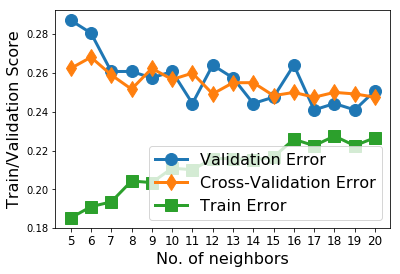

best model is one with number of neighbors=
[17]
Test error corresponding to best_k is :
0.2058047493403694


In [13]:
#change______________________________________________________
#k_list=[1,5,11,15,21]
k_range = np.arange(5, 21, 1)

kModels=dict()
kValErr=dict()
kCValErr=dict()
kTrnErr=dict()

#change______________________________________________________
#for k in k_list:
for k in k_range:
    neigh = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree')
    kModels[k]=neigh.fit(X_trn,y_trn)
    kValErr[k]=1-neigh.score(X_val,y_val)
    kCValErr[k] = 1- np.mean(cross_val_score(neigh,X_trn,y_trn, cv=10))
    kTrnErr[k]=1-neigh.score(X_trn,y_trn)



plt.figure()
plt.plot(kValErr.keys(), kValErr.values(), marker='o', linewidth=3, markersize=12)
plt.plot(kCValErr.keys(), kCValErr.values(), marker='d', linewidth=3, markersize=12)
plt.plot(kTrnErr.keys(), kTrnErr.values(), marker='s', linewidth=3, markersize=12)
plt.xlabel('No. of neighbors', fontsize=16)
plt.ylabel('Train/Validation Score', fontsize=16)
plt.xticks(list(kValErr.keys()), fontsize=12)
plt.legend(['Validation Error','Cross-Validation Error', 'Train Error'], fontsize=16)
#change__________________removed the below line
#plt.axis([0, 22, -1, 1])

plt.show()

#temp=min(kValErr.values())
temp=min(kCValErr.values())
#best_k=[param for param,score in kValErr.items() if score==temp]
best_k=[param for param,score in kCValErr.items() if score==temp]
print ('best model is one with number of neighbors=')
print (best_k)

print ('Test error corresponding to best_k is :')
print (1-kModels[best_k[0]].score(X_tst,y_tst))

In [14]:
#change______________
k_best = best_k[0]
clf = KNeighborsClassifier(n_neighbors=k_best, algorithm='kd_tree')
knmodel=clf.fit(X_trn,y_trn) 
print (1-knmodel.score(X_tst,y_tst))

predict_proba = knmodel.predict_proba(X_tst)
fpr_kn, tpr_kn, thresholds_kn = metrics.roc_curve(y_tst, predict_proba[:,1])
roc_auc_kn = metrics.auc(fpr_kn, tpr_kn)

0.2058047493403694


In [15]:
# Low number of neighbors also indicate a highly non-linear model

In [16]:
#random forest
from sklearn.ensemble import RandomForestClassifier

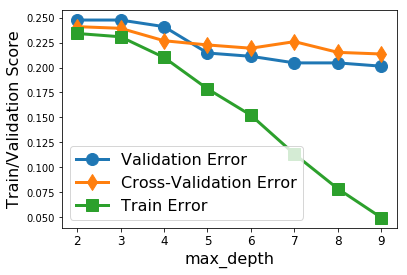

best model is one with max_depth=
[9]
Test error corresponding to this model is :
0.19261213720316628


In [17]:
d_range = np.arange(2, 10, 1)

rfModels=dict()
rfValErr=dict()
rfCValErr=dict()
rfTrnErr=dict()


for d in d_range:
    clf = RandomForestClassifier(n_estimators=100, max_depth=d,random_state=0,max_features=4)
    rfModels[d]=clf.fit(X_trn,y_trn)
    rfTrnErr[d]=1-clf.score(X_trn,y_trn)
    rfCValErr[d] = 1- np.mean(cross_val_score(clf,X_trn,y_trn, cv=10))
    rfValErr[d]=1-clf.score(X_val,y_val)

plt.figure()
plt.plot(rfValErr.keys(), rfValErr.values(), marker='o', linewidth=3, markersize=12)
plt.plot(rfCValErr.keys(), rfCValErr.values(), marker='d', linewidth=3, markersize=12)
plt.plot(rfTrnErr.keys(), rfTrnErr.values(), marker='s', linewidth=3, markersize=12)
plt.xlabel('max_depth', fontsize=16)
plt.ylabel('Train/Validation Score', fontsize=16)
plt.xticks(list(rfValErr.keys()), fontsize=12)
plt.legend(['Validation Error','Cross-Validation Error', 'Train Error'], fontsize=16)
#change____________________________________________________________
#plt.axis([1, 11, 0, 0.5])

plt.show()

#temp=min(rfValErr.values())
temp=min(rfCValErr.values())
#best_d=[param for param,score in rfValErr.items() if score==temp]
best_d=[param for param,score in rfCValErr.items() if score==temp]
print ('best model is one with max_depth=')
print (best_d)

print ('Test error corresponding to this model is :')
print (1-rfModels[best_d[0]].score(X_tst,y_tst))

In [18]:
clf = RandomForestClassifier(n_estimators=100, max_depth=best_d[0],random_state=0,max_features=4)
rfmodel=clf.fit(X_trn,y_trn) 
print (1-rfmodel.score(X_tst,y_tst))

predict_proba = rfmodel.predict_proba(X_tst)
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_tst, predict_proba[:,1])
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)

0.19261213720316628


In [19]:
#naive bayes
from sklearn.naive_bayes import GaussianNB

In [20]:
clf=GaussianNB()
nbmodel=clf.fit(X_trn,y_trn)
nbTrnErr=1-clf.score(X_trn,y_trn)
nbValErr=1-clf.score(X_val,y_val)
nbCValErr=1- np.mean(cross_val_score(clf,X_trn,y_trn, cv=10))
print (nbValErr)
print (nbCValErr)

0.35973597359735976
0.3233472203405139


In [21]:
#change_____________________________
predict_proba = nbmodel.predict_proba(X_tst)

fpr_nb, tpr_nb, thresholds_nb = metrics.roc_curve(y_tst, predict_proba[:,1])

roc_auc_nb = metrics.auc(fpr_nb, tpr_nb)

In [22]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [23]:
clf = LogisticRegression(random_state=0, solver='liblinear')
lrmodel=clf.fit(X_trn,y_trn)
lrTrnErr=1-clf.score(X_trn,y_trn)
lrValErr=1-clf.score(X_val,y_val)
lrCValErr=1- np.mean(cross_val_score(clf,X_trn,y_trn, cv=10))
print (lrValErr)
print (lrCValErr)

0.3927392739273927
0.3829566906019961


In [24]:
#change_____________________________
predict_proba = lrmodel.predict_proba(X_tst)

fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_tst, predict_proba[:,1])

roc_auc_lr = metrics.auc(fpr_lr, tpr_lr)

In [25]:
#Boosting
from xgboost import XGBClassifier

In [26]:
clf=XGBClassifier()
xgbmodel=clf.fit(X_trn,y_trn)
xgbTrnErr=1-clf.score(X_trn,y_trn)
xgbValErr=1-clf.score(X_val,y_val)
print (xgbValErr)

0.2178217821782178


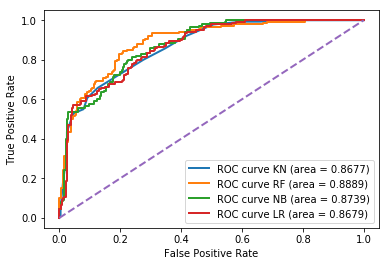

In [27]:
#change___________________________________
from sklearn import metrics

plt.figure()

plt.plot(fpr_kn, tpr_kn, lw=2, label = 'ROC curve KN (area = %0.4f)'% roc_auc_kn)
plt.plot(fpr_rf, tpr_rf, lw=2, label = 'ROC curve RF (area = %0.4f)'% roc_auc_rf)
plt.plot(fpr_nb, tpr_nb, lw=2, label = 'ROC curve NB (area = %0.4f)'% roc_auc_nb)
plt.plot(fpr_lr, tpr_lr, lw=2, label = 'ROC curve LR (area = %0.4f)'% roc_auc_lr)

plt.plot([0,1],[0,1],lw=2,linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()